# Sub-daily data

Here we fit NeuralProphet to data with 5-minute resolution (daily temperatures at Yosemite). 

Using some common sense, we set:
* First, we disable weekly seasonality, as nature does not follow the human week's calendar.
* Second, we disable changepoints, as the dataset only contains two months of data

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
df = pd.read_csv('../example_data/yosemite_temps.csv')

In [2]:
m = NeuralProphet(
    n_changepoints=0,
    weekly_seasonality=False,
    log_level="ERROR",
)
metrics = m.fit(df, freq='5min')

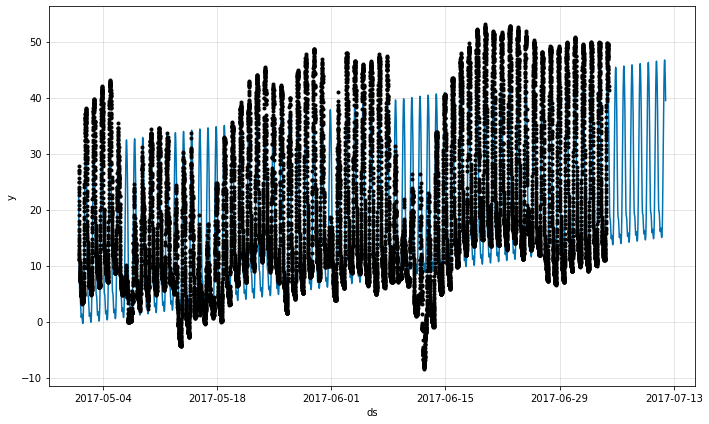

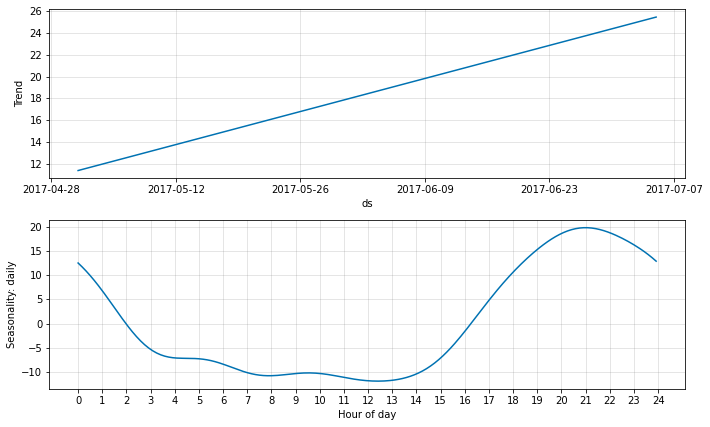

In [3]:
future = m.make_future_dataframe(df, periods=60//5*24*7, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Adding autoregression
Further, we can make use of the fact that tomorrow's weather is most likely similar to yesterdays weather.
This means that we will regress our time series on it's most recent past values, also known as autoregression.

We can achieve this by setting `n_lags` to a reasonable value. 

In [4]:
m = NeuralProphet(
    n_lags=12,
    n_forecasts=1,
    changepoints_range=0.9,
    n_changepoints=10,
    weekly_seasonality=False,
    log_level="INFO",
    train_speed=-1,
)
metrics = m.fit(df, freq='5min')

INFO: nprophet - _handle_missing_data: 12 NaN values in column y were auto-imputed.
INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 128
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 6
INFO: nprophet.config - apply_train_speed: train_speed--1 decreased batch_size to 64
INFO: nprophet.config - apply_train_speed: train_speed--1 increased epochs to 12


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
INFO: nprophet.config - apply_train_speed: train_speed--1 decreased learning_rate to 0.09369087114301929
Epoch[12/12]: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s, SmoothL1Loss=6.83e-5, MAE=0.38, RegLoss=0] 


INFO: nprophet - _handle_missing_data: 12 NaN values in column y were auto-imputed.


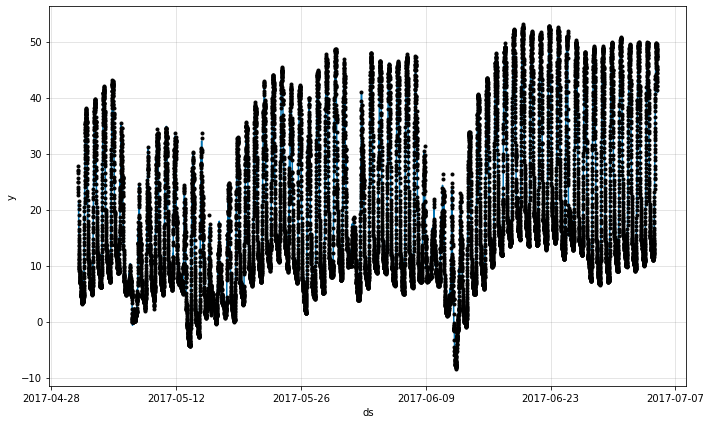

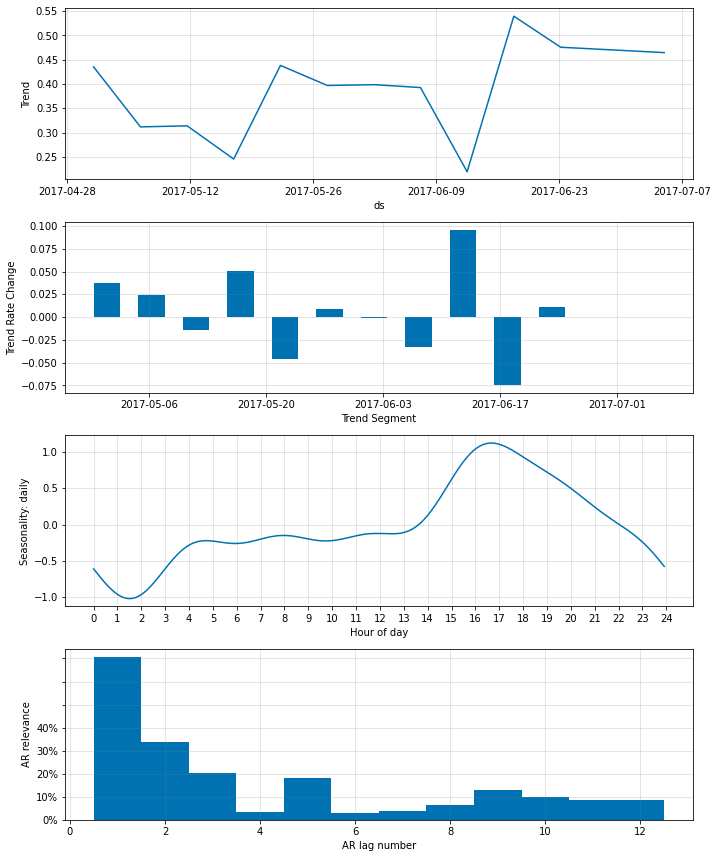

In [5]:
future = m.make_future_dataframe(df, periods=60//5*24*7, n_historic_predictions=len(df))
forecast = m.predict(future)
fig = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()